Task A

In [7]:
import csv

# Load data from the CSV file into memory as a list
def load_data(file_path):
    with open('lung_cancer_data.csv', mode='r') as file:
        reader = csv.reader(file)
        data = [row for row in reader]
    return data

# Print COM731 header three times
def print_header():
    print("COM731\n" * 3)

# a1: Retrieve demographic information
def get_demographics(data, patient_id):
    for row in data[1:]:  # Skip header row
        if row[0] == patient_id:
            return {
                "Age": row[1],
                "Gender": row[2],
                "Smoking History": row[3],
                "Ethnicity": row[9]
            }
    return "Patient ID not found."

# a2: Retrieve medical history details based on ethnicity
def get_medical_history(data, ethnicity):
    results = []
    for row in data[1:]:  # Skip header row
        if row[9] == ethnicity:
            results.append({
                "Family History": row[11],
                "Comorbidity Diabetes": row[12],
                "Comorbidity Kidney Disease": row[16],
                "Haemoglobin Level": row[23]
            })
    return results if results else "No data found for the specified ethnicity."

# a3: Retrieve treatment details for patients surviving > 100 months on a certain treatment
def get_treatment_details(data, treatment):
    results = []
    for row in data[1:]:  # Skip header row
        if row[7] == treatment and int(row[8]) > 100:
            results.append({
                "Age": row[1],
                "Tumor Size": row[4],
                "Tumor Location": row[5],
                "Stage": row[6]
            })
    return results if results else "No data found for the specified treatment and survival condition."

# a4: Custom condition - Retrieve patients with high blood pressure and high glucose levels
def get_custom_info(data, systolic_threshold, glucose_threshold):
    results = []
    for row in data[1:]:  # Skip header row
        if int(row[20]) > systolic_threshold and float(row[34]) > glucose_threshold:
            results.append({
                "Patient ID": row[0],
                "Blood Pressure Systolic": row[20],
                "Glucose Level": row[34],
                "Survival Months": row[8]
            })
    return results if results else "No data found for the specified conditions."

# Testing the implementation
file_path = '/mnt/data/lung_cancer_data.csv'
data = load_data(file_path)

# Print headers
print_header()

# a1: Retrieve demographic information
demographics = get_demographics(data, "13117")
print("Demographic Information:", demographics)

# a2: Retrieve medical history based on ethnicity
medical_history = get_medical_history(data, "Caucasian")
print("Medical History for Caucasian Ethnicity:", medical_history[:3])  # Display only first 3 for brevity

# a3: Retrieve treatment details
treatment_details = get_treatment_details(data, "Radiation Therapy")
print("Treatment Details:", treatment_details[:3])  # Display only first 3 for brevity

# a4: Custom condition retrieval
custom_info = get_custom_info(data, 140, 100.0)
print("Custom Condition Results:", custom_info[:3])  # Display only first 3 for brevity


COM731
COM731
COM731

Demographic Information: {'Age': '68', 'Gender': 'Male', 'Smoking History': 'Current Smoker', 'Ethnicity': 'Hispanic'}
Medical History for Caucasian Ethnicity: [{'Family History': 'Yes', 'Comorbidity Diabetes': 'Yes', 'Comorbidity Kidney Disease': 'Yes', 'Haemoglobin Level': '16.8'}, {'Family History': 'No', 'Comorbidity Diabetes': 'No', 'Comorbidity Kidney Disease': 'No', 'Haemoglobin Level': '16.24'}, {'Family History': 'Yes', 'Comorbidity Diabetes': 'No', 'Comorbidity Kidney Disease': 'No', 'Haemoglobin Level': '12.57'}]
Treatment Details: [{'Age': '58', 'Tumor Size': '78.45', 'Tumor Location': 'Lower Lobe', 'Stage': 'Stage I'}, {'Age': '37', 'Tumor Size': '87.27', 'Tumor Location': 'Lower Lobe', 'Stage': 'Stage IV'}, {'Age': '50', 'Tumor Size': '17.51', 'Tumor Location': 'Lower Lobe', 'Stage': 'Stage IV'}]
Custom Condition Results: [{'Patient ID': '13117', 'Blood Pressure Systolic': '161', 'Glucose Level': '113.92', 'Survival Months': '44'}, {'Patient ID': '18

Task B

In [11]:
import pandas as pd

# Load the dataset using pandas
def load_dataframe(file_path):
    return pd.read_csv('lung_cancer_data.csv')

# Print COM731 header three times
def print_header():
    print("COM731\n" * 3)

# b1: Identify the top 3 treatments for a certain ethnicity where patients survived > 100 months
def top_treatments(dataframe, ethnicity):
    filtered_df = dataframe[(dataframe['Ethnicity'] == ethnicity) & (dataframe['Survival_Months'] > 100)]
    top_treatments = filtered_df['Treatment'].value_counts().head(3)
    return top_treatments

# b2: Analyse average white blood cell counts for certain treatments based on a certain ethnicity
def avg_white_blood_cells(dataframe, treatment, ethnicity):
    filtered_df = dataframe[(dataframe['Ethnicity'] == ethnicity) & (dataframe['Treatment'] == treatment)]
    avg_wbc = filtered_df['White_Blood_Cell_Count'].mean()
    return avg_wbc

# b3: Analyse average number of smoking packs for patients in each treatment group
# with blood pressure (pulse) > 90 and tumor size < 15.0 mm, grouped by tumor location
def avg_smoking_packs(dataframe):
    filtered_df = dataframe[(dataframe['Blood_Pressure_Pulse'] > 90) & (dataframe['Tumor_Size_mm'] < 15.0)]
    grouped_df = filtered_df.groupby(['Treatment', 'Tumor_Location'])['Smoking_Pack_Years'].mean()
    return grouped_df

# b4: Custom analysis - Identify the average survival months for each cancer stage
def avg_survival_by_stage(dataframe):
    survival_analysis = dataframe.groupby('Stage')['Survival_Months'].mean()
    return survival_analysis

# Load data for Task B
file_path = 'lung_cancer_data.csv'
dataframe = load_dataframe(file_path)

# Print headers
print_header()

# b1: Top 3 treatments for a certain ethnicity (e.g., Caucasian)
top_treatments_result = top_treatments(dataframe, "Caucasian")
print("Top 3 Treatments for Caucasian Ethnicity:")
print(top_treatments_result)

# b2: Average white blood cell count for a specific treatment and ethnicity (e.g., Chemotherapy, Caucasian)
avg_wbc_result = avg_white_blood_cells(dataframe, "Chemotherapy", "Caucasian")
print("\nAverage White Blood Cell Count for Chemotherapy in Caucasian Ethnicity:", avg_wbc_result)

# b3: Average number of smoking packs grouped by treatment and tumor location
avg_smoking_packs_result = avg_smoking_packs(dataframe)
print("\nAverage Number of Smoking Packs by Treatment and Tumor Location:")
print(avg_smoking_packs_result)

# b4: Custom analysis - Average survival months by cancer stage
avg_survival_by_stage_result = avg_survival_by_stage(dataframe)
print("\nAverage Survival Months by Cancer Stage:")
print(avg_survival_by_stage_result)


COM731
COM731
COM731

Top 3 Treatments for Caucasian Ethnicity:
Treatment
Chemotherapy         350
Radiation Therapy    188
Surgery              170
Name: count, dtype: int64

Average White Blood Cell Count for Chemotherapy in Caucasian Ethnicity: 6.750183447098976

Average Number of Smoking Packs by Treatment and Tumor Location:
Treatment          Tumor_Location
Chemotherapy       Lower Lobe        53.168824
                   Middle Lobe       51.408966
                   Upper Lobe        55.259167
Radiation Therapy  Lower Lobe        41.365357
                   Middle Lobe       50.610741
                   Upper Lobe        54.349583
Surgery            Lower Lobe        51.673684
                   Middle Lobe       53.086923
                   Upper Lobe        54.312941
Targeted Therapy   Lower Lobe        43.178000
                   Middle Lobe       48.728000
                   Upper Lobe        42.567647
Name: Smoking_Pack_Years, dtype: float64

Average Survival Months by C

Task C

COM731
COM731
COM731



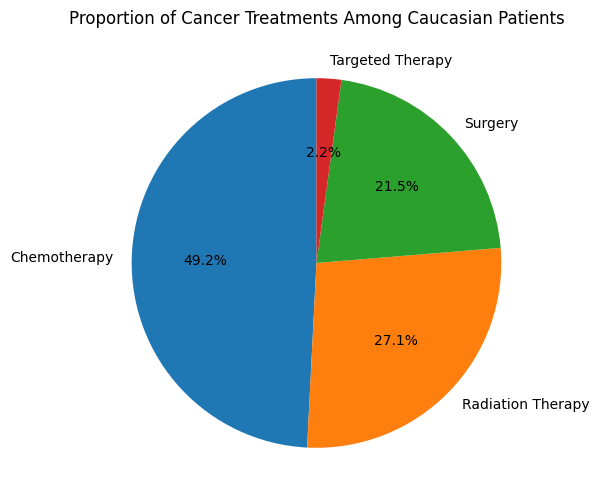

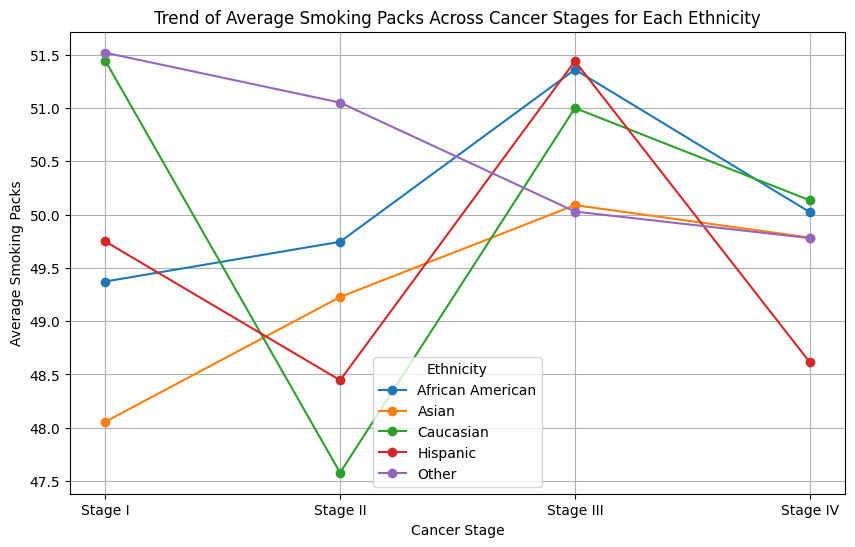

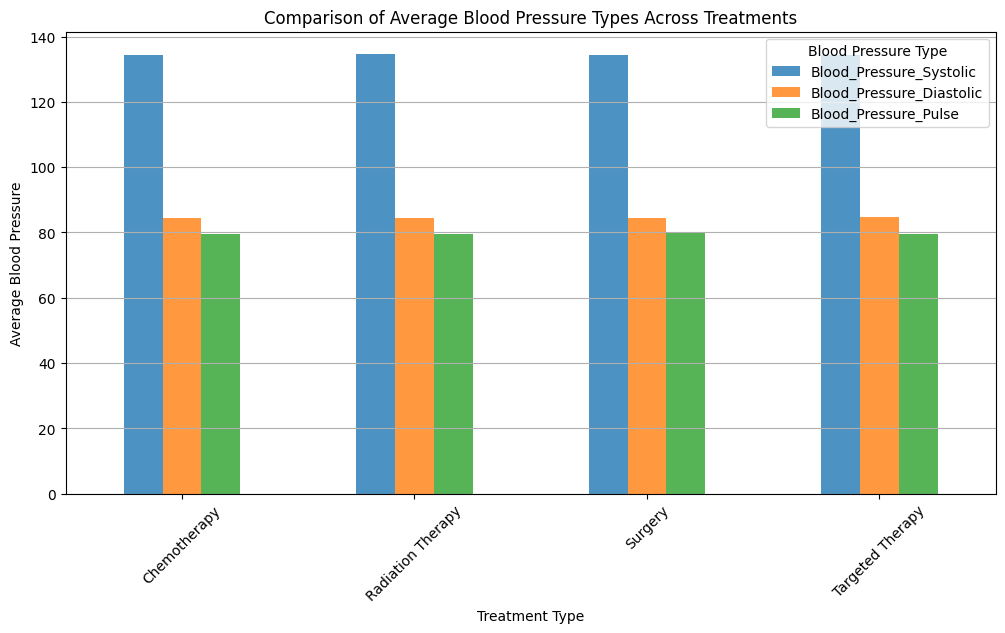

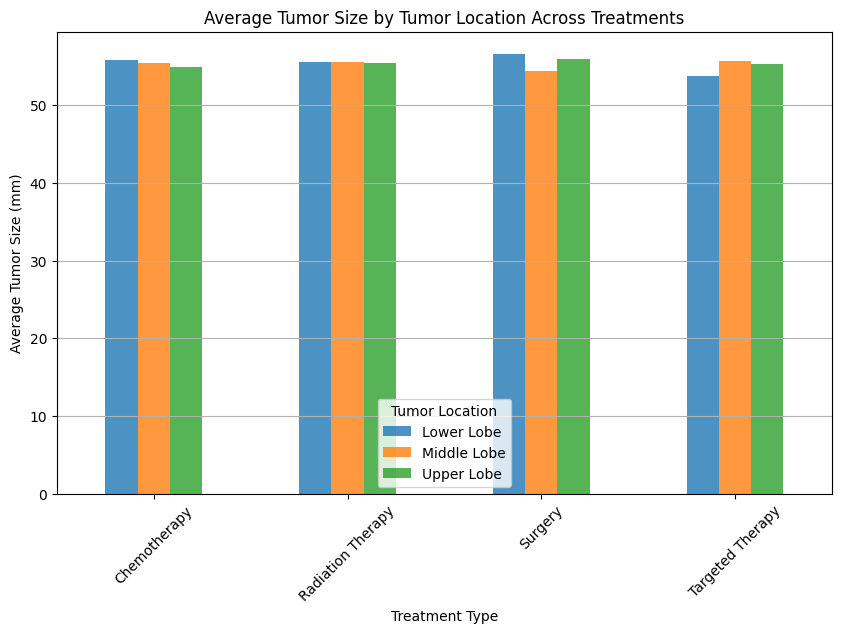

In [12]:
import matplotlib.pyplot as plt

# c1: Proportion of cancer treatments among a certain ethnicity
def plot_treatment_proportion(dataframe, ethnicity):
    filtered_df = dataframe[dataframe['Ethnicity'] == ethnicity]
    treatment_counts = filtered_df['Treatment'].value_counts()
    
    plt.figure(figsize=(8, 6))
    plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Proportion of Cancer Treatments Among {ethnicity} Patients")
    plt.show()

# c2: Trend of average smoking packs consumption across different cancer stages for each ethnicity
def plot_smoking_trend_by_stage(dataframe):
    avg_smoking_by_stage_ethnicity = dataframe.groupby(['Stage', 'Ethnicity'])['Smoking_Pack_Years'].mean().unstack()
    
    plt.figure(figsize=(10, 6))
    for ethnicity in avg_smoking_by_stage_ethnicity.columns:
        plt.plot(avg_smoking_by_stage_ethnicity.index, avg_smoking_by_stage_ethnicity[ethnicity], marker='o', label=ethnicity)
    
    plt.title("Trend of Average Smoking Packs Across Cancer Stages for Each Ethnicity")
    plt.xlabel("Cancer Stage")
    plt.ylabel("Average Smoking Packs")
    plt.legend(title="Ethnicity")
    plt.grid(True)
    plt.show()

# c3: Comparison of average blood pressure types across different treatment types
def plot_blood_pressure_comparison(dataframe):
    avg_blood_pressure = dataframe.groupby('Treatment')[['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse']].mean()
    
    avg_blood_pressure.plot(kind='bar', figsize=(12, 6), alpha=0.8)
    plt.title("Comparison of Average Blood Pressure Types Across Treatments")
    plt.xlabel("Treatment Type")
    plt.ylabel("Average Blood Pressure")
    plt.legend(title="Blood Pressure Type")
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

# c4: Custom visualization - Average tumor size by tumor location across treatments
def plot_avg_tumor_size_by_location(dataframe):
    avg_tumor_size = dataframe.groupby(['Treatment', 'Tumor_Location'])['Tumor_Size_mm'].mean().unstack()
    
    avg_tumor_size.plot(kind='bar', figsize=(10, 6), alpha=0.8)
    plt.title("Average Tumor Size by Tumor Location Across Treatments")
    plt.xlabel("Treatment Type")
    plt.ylabel("Average Tumor Size (mm)")
    plt.legend(title="Tumor Location")
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

# Perform the visualizations
print("COM731\n" * 3)

# c1: Proportion of cancer treatments among a certain ethnicity (e.g., Caucasian)
plot_treatment_proportion(dataframe, "Caucasian")

# c2: Trend of smoking packs across cancer stages for each ethnicity
plot_smoking_trend_by_stage(dataframe)

# c3: Blood pressure comparison across treatments
plot_blood_pressure_comparison(dataframe)

# c4: Custom visualization - Average tumor size by location across treatments
plot_avg_tumor_size_by_location(dataframe)
